In [1]:
import pandas as pd

X_train = pd.read_csv('[your file path]/X_train.csv')
Y_train = pd.read_csv('[your file path]/Y_train.csv')

X_test = pd.read_csv('[your file path]/X_test.csv')
Y_test = pd.read_csv('[your file path]/Y_test.csv')

In [2]:
print (X_train.head())
print
print (X_test.head())

    Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001032   Male      No          0  Graduate            No   
1  LP001824   Male     Yes          1  Graduate            No   
2  LP002928   Male     Yes          0  Graduate            No   
3  LP001814   Male     Yes          2  Graduate            No   
4  LP002244   Male     Yes          0  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4950                0.0         125               360   
1             2882             1843.0         123               480   
2             3000             3416.0          56               180   
3             9703                0.0         112               360   
4             2333             2417.0         136               360   

   Credit_History Property_Area  
0               1         Urban  
1               1     Semiurban  
2               1     Semiurban  
3               1         Urban  
4           

In [16]:
print (Y_train.head())
print
print (Y_test.head())

  Target
0      Y
1      Y
2      Y
3      Y
4      Y

  Target
0      N
1      Y
2      Y
3      Y
4      Y


In [3]:
# check data types

X_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area         object
dtype: object

In [4]:
%matplotlib inline

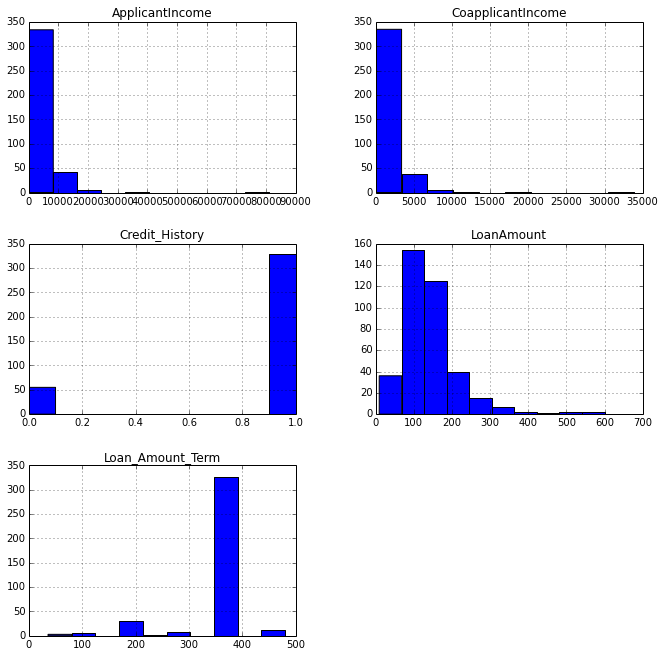

In [5]:
# Apply Feature Scaling on continuous variables so that they can be compared on the same ground

import matplotlib.pyplot as plt


p = X_train[X_train.dtypes[(X_train.dtypes=="float64")|(X_train.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

In [13]:
# Use KNN to check the performance before & after feature scaling, 
# because KNN accuracy is easy to be influnced when variables are in different scale

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



## Before using feature scaling

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 
                   'Loan_Amount_Term', 'Credit_History']],Y_train)
print accuracy_score(Y_test,knn.predict(X_test[['ApplicantIncome', 'CoapplicantIncome',
                             'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]))

0.614583333333


/Library/Python/2.7/site-packages/ipykernel-4.2.1-py2.7.egg/ipykernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [14]:
## After using feature scaling

# the percentage of each target value
print Y_train.Target.value_counts()/Y_train.Target.count()
print 
print Y_test.Target.value_counts()/Y_test.Target.count()

Y    0.705729
N    0.294271
Name: Target, dtype: float64

Y    0.635417
N    0.364583
Name: Target, dtype: float64


In [17]:
from sklearn.preprocessing import MinMaxScaler

min_max=MinMaxScaler()
X_train_minmax=min_max.fit_transform(X_train[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_minmax=min_max.fit_transform(X_test[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_minmax,Y_train)
print accuracy_score(Y_test,knn.predict(X_test_minmax))

0.75


/Library/Python/2.7/site-packages/ipykernel-4.2.1-py2.7.egg/ipykernel/__main__.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [20]:
# Feature Standarization

from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression

# Before Standarization
log=LogisticRegression(penalty='l2',C=.01)
log.fit(X_train[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 
                   'Loan_Amount_Term', 'Credit_History']],Y_train)
print accuracy_score(Y_test,log.predict(X_test[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 
                   'Loan_Amount_Term', 'Credit_History']]))
print

# After Standarization
X_train_scale=scale(X_train[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_scale=scale(X_test[['ApplicantIncome', 'CoapplicantIncome',
               'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

log=LogisticRegression(penalty='l2',C=.01)
log.fit(X_train_scale,Y_train)
print accuracy_score(Y_test,log.predict(X_test_scale))

0.614583333333

0.75


/Library/Python/2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Python/2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for col in X_train.columns.values:
    # Encoding only categorical variables
    if X_train[col].dtypes=='object':
        X_train[col]=le.fit_transform(X_train[col])
        X_test[col]=le.fit_transform(X_test[col])
        
print X_train.head()

   Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0       11       1        0           0          0              0   
1      151       1        1           1          0              0   
2      367       1        1           0          0              0   
3      150       1        1           2          0              0   
4      236       1        1           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4950                0.0         125               360   
1             2882             1843.0         123               480   
2             3000             3416.0          56               180   
3             9703                0.0         112               360   
4             2333             2417.0         136               360   

   Credit_History  Property_Area  
0               1              2  
1               1              1  
2               1              1  
3               1 

In [24]:
X_train_scale=scale(X_train)
X_test_scale=scale(X_test)

log=LogisticRegression(penalty='l2',C=.01)
log.fit(X_train_scale,Y_train)
print accuracy_score(Y_test,log.predict(X_test_scale))

0.75


/Library/Python/2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
# One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder(sparse=False)

X_train_scale=scale(X_train)
X_test_scale=scale(X_test)

# Before one-hot encoding
log=LogisticRegression(penalty='l2',C=1)
log.fit(X_train_scale,Y_train)
print accuracy_score(Y_test,log.predict(X_test_scale))
print

X_train_one_hot=X_train
X_test_one_hot=X_test

columns=['Gender', 'Married', 'Dependents', 'Education','Self_Employed',
          'Credit_History', 'Property_Area']

for col in columns:
    # Fitting One Hot Encoding on train data
    temp = ohe.fit_transform(X_train[[col]])
    # Changing the encoded features into a data frame with new column names
    temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in X_train[col].value_counts().index])
    # In side by side concatenation index values should be same
    # Setting the index values similar to the X_train data frame
    temp=temp.set_index(X_train.index.values)
    # adding the new One Hot Encoded varibales to the train data frame
    X_train_one_hot=pd.concat([X_train_one_hot,temp],axis=1)
    
    temp = ohe.fit_transform(X_test[[col]])
    temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in X_test[col].value_counts().index])
    temp=temp.set_index(X_test.index.values)
    X_test_one_hot=pd.concat([X_test_one_hot,temp],axis=1)
    
# After one-hot encoding
X_train_scale=scale(X_train_one_hot)
X_test_scale=scale(X_test_one_hot)

log=LogisticRegression(penalty='l2',C=1)
log.fit(X_train_scale,Y_train)
print accuracy_score(Y_test,log.predict(X_test_scale))

/Library/Python/2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Python/2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.739583333333

0.75
